![ML](https://static1.squarespace.com/static/57812963f7e0aba104cde634/t/578133b0ff7c501754eca98b/1517447071341/?format=1500w)

## In this chapter what I am looking for is to predict how employees will behave.  Do they leave the company or stay?


## For this, what I will do is to build employee an churn prediction model.

### Import libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

### Load Data

In [59]:
df_cleaned=pd.read_csv('data/HR_data_cleaned.csv')

In [60]:
df_cleaned.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data quality issues 

In [61]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
satisfaction_level       11991 non-null float64
last_evaluation          11991 non-null float64
number_project           11991 non-null int64
average_monthly_hours    11991 non-null int64
time_spend_company       11991 non-null int64
work_accident            11991 non-null int64
left                     11991 non-null int64
promotion_last_5years    11991 non-null int64
department               11991 non-null object
salary                   11991 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


### Pre-Processing Data

After a quick review of the dataset I realise some issues such that:

1.To deal better with ML algorithms and statistics the features must have a NUMERICAL value. Therefore ,some **features (sales and salary)** will be transformed to numerical.


2.**left** : as "target" column, it should occupy the last position in the dataframe. It will be moved to there.
________________________________________________________________________________________________________________________

**1. Convert to numerical** : "salary" and "sales"

In [62]:
df_cleaned['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [63]:
#Dummy Coding
hr_salary = pd.get_dummies(df_cleaned['salary'])
hr_salary.sample(10)

,high,low,medium
1418,0,1,0
7080,0,1,0
6997,0,1,0
8766,1,0,0
7859,0,1,0
4656,1,0,0
3108,0,0,1
5594,0,0,1
10185,0,0,1
1501,0,0,1


In [64]:
#join
hr2=pd.merge(df_cleaned,hr_salary,left_index=True, right_index=True)
hr2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [65]:
#Now it is the turn of "department" 
hr2['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [66]:
hr_department = pd.get_dummies(df_cleaned['department'])
hr_department.sample(10)

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
6312,1,0,0,0,0,0,0,0,0,0
2241,0,0,0,0,0,0,0,0,0,1
5805,0,0,0,0,0,0,0,1,0,0
4802,0,0,0,0,0,0,0,0,1,0
11811,0,0,0,0,0,0,0,0,1,0
1373,0,0,0,0,0,0,0,0,1,0
9063,0,0,0,0,0,0,1,0,0,0
733,0,0,0,0,0,0,0,0,1,0
10466,0,0,0,0,0,0,0,1,0,0
6666,0,0,0,0,0,0,0,0,0,1


In [67]:
hr2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [68]:
#join
hr3=pd.merge(hr2,hr_department,left_index=True, right_index=True)

In [69]:
#Now, I can remove "sales" and "salary" columns from DataFrame.Therefore it will include only numeric features
hr_numeric=hr3.drop(columns=['department','salary'])
hr_numeric.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,high,low,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


**2.Change the order of columns**: "left" column as "target" will be moved to the final of the data frame

In [70]:
cols = hr_numeric.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'work_accident',
 'left',
 'promotion_last_5years',
 'high',
 'low',
 'medium',
 'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical']

In [71]:
#Now "left" column will be the last one
cols_new = cols[:6]+cols[7:]+cols[6:7]
cols_new

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'work_accident',
 'promotion_last_5years',
 'high',
 'low',
 'medium',
 'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical',
 'left']

In [72]:
#finally, it's included in the new dataframe called: hr_data
hr_data= hr_numeric[cols_new]
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,high,low,medium,...,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,left
0,0.38,0.53,2,157,3,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [73]:
#check values' type: 
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 21 columns):
satisfaction_level       11991 non-null float64
last_evaluation          11991 non-null float64
number_project           11991 non-null int64
average_monthly_hours    11991 non-null int64
time_spend_company       11991 non-null int64
work_accident            11991 non-null int64
promotion_last_5years    11991 non-null int64
high                     11991 non-null uint8
low                      11991 non-null uint8
medium                   11991 non-null uint8
IT                       11991 non-null uint8
RandD                    11991 non-null uint8
accounting               11991 non-null uint8
hr                       11991 non-null uint8
management               11991 non-null uint8
marketing                11991 non-null uint8
product_mng              11991 non-null uint8
sales                    11991 non-null uint8
support                  11991 non-null uint8
technical    

At this point, our dataset is ready for being modeled.  Let's save it before starting!

In [74]:
hr_data.to_csv('data/HR_data_numeric.csv',index=False)

### Load Data

In [75]:
df_numeric=pd.read_csv('data/HR_data_numeric.csv')

In [76]:
df_numeric.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'high', 'low', 'medium', 'IT', 'RandD',
       'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales',
       'support', 'technical', 'left'],
      dtype='object')

### Definition of variables and split of the data

In [77]:
x=df_numeric[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'high', 'low', 'medium', 'IT', 'RandD',
       'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales',
       'support', 'technical']] #X will be the features
y=df_numeric['left'] #left column will be the target one (1=left, 0 =stay)

In [78]:
#Split the dataset into two parts: train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [79]:
#checking we have the desired 70% train, 30% split of the data
print("{0:0.2f}% in training set".format((len(x_train)/len(df_numeric.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df_numeric.index)) * 100))

66.99% in training set
33.01% in test set


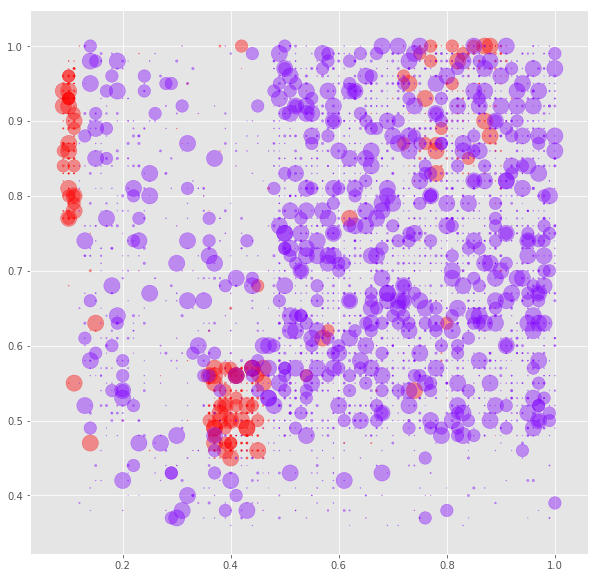

In [81]:
#Graph

X = df_numeric[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'high', 'low', 'medium', 'IT', 'RandD',
       'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales',
       'support', 'technical']].values
y = df_numeric['left']
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],X[:2],c=y,cmap="rainbow",alpha=0.4)
plt.show()

The graph shows in red the 3 clusters that I got in R exercise obtained using Elbow Method (see step 2.DataMining_R)

## Choosing the model


### Let's start with _Random Forest_ in order to determine which are the most important variables

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rclf=RandomForestClassifier(max_depth=20,oob_score=True)
rclf.fit(x,y)

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [99]:
rclf.oob_score_

0.9764823617713285

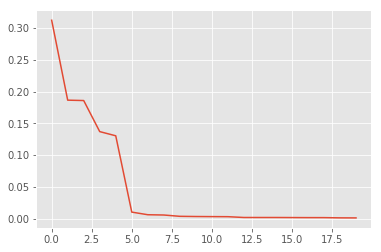

In [85]:
plt.plot(sorted(rclf.feature_importances_,reverse=True))
plt.show()

As I can see in the graph, there are 5 main variables: 

* __satisfaction level (0.31)__ is the most important variable in the model followed by: 
    *time spend at company: 0.19
    * number projects: 0.18
    * average_montly_hours: 0.14
    * last evaluation: 0.13

Past the aforementioned columns, the model remains stable.

In [87]:
print (sorted(zip(map(lambda x: round(x, 4), rclf.feature_importances_), x_train), reverse=True))

[(0.3123, 'satisfaction_level'), (0.1865, 'time_spend_company'), (0.1859, 'number_project'), (0.137, 'average_monthly_hours'), (0.1304, 'last_evaluation'), (0.0103, 'work_accident'), (0.0061, 'low'), (0.0057, 'high'), (0.0036, 'technical'), (0.0033, 'medium'), (0.0032, 'support'), (0.0031, 'sales'), (0.0018, 'promotion_last_5years'), (0.0018, 'marketing'), (0.0018, 'RandD'), (0.0017, 'IT'), (0.0016, 'management'), (0.0016, 'hr'), (0.0012, 'product_mng'), (0.0011, 'accounting')]


### From now on, I will use only this 5 variables and drop the less important variables out of the model

In [227]:
x=df_numeric[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company']] 
y=df_numeric['left'] 

In [228]:
#Split the dataset into two parts: train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [229]:
#checking we have the desired 70% train, 30% split of the data
print("{0:0.2f}% in training set".format((len(x_train)/len(df_numeric.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df_numeric.index)) * 100))

66.99% in training set
33.01% in test set


###  _K-nearest Neighbors_

In [234]:
rclf2=RandomForestClassifier(max_depth=20,oob_score=True)
rclf2.fit(x,y)

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [235]:
rclf2.oob_score_

0.9788174464181469

In [236]:
#calculating some metrics
from sklearn import metrics

print("Accuracy:",accuracy_score(y_test,rclf2.predict(x_test))) 
print("Precision:",metrics.precision_score(y_test,rclf2.predict(x_test))) #when a model makes a prediction, how often it is correct
print("Recall",metrics.recall_score(y_test,rclf2.predict(x_test))) 

Accuracy: 0.9974734714502274
Precision: 0.9984709480122325
Recall 0.986404833836858


####  Looking for the best accuracy, I will analyse some more prediction models 

###  _K-nearest Neighbors_

In [177]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier(n_neighbors=8)

In [178]:
clf1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [224]:
#how often is the classifier correct?
from sklearn.metrics import accuracy_score  
accuracy_score(y_test,clf1.predict(x_test))

0.9717028802425467

In [180]:
from sklearn.model_selection import cross_val_score

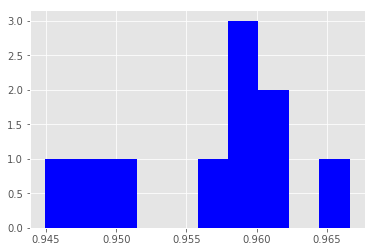

In [181]:
kn=cross_val_score(clf1,x,y,cv=10,scoring="accuracy")
plt.hist(kn, color='blue');

In [182]:
#Fitting the model
from sklearn.model_selection import GridSearchCV

In [183]:
clf1=GridSearchCV(estimator =KNeighborsClassifier(n_neighbors=5),
                  param_grid={"n_neighbors":np.arange(1,50)})

clf1.fit(x,y) #training the model with the best_params
clf1.best_params_

{'n_neighbors': 4}

In [184]:
#calculating some metrics
from sklearn import metrics

print("Accuracy:",accuracy_score(y_test,clf1.predict(x_test))) #now the accuracy is higher than before
print("Precision:",metrics.precision_score(y_test,clf1.predict(x_test))) #when a model makes a prediction, how often it is correct
print("Recall",metrics.recall_score(y_test,clf1.predict(x_test))) 

Accuracy: 0.9717028802425467
Precision: 0.9230769230769231
Recall 0.9063444108761329


In [42]:
#now, with the entire dataset
cross_val_score(KNeighborsClassifier(n_neighbors=4),x,y).mean()

0.9588017031597258

## __Decision Tree__

In [189]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
# Create the estimator and train it
dtc=DecisionTreeClassifier(max_depth=4)

In [160]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [191]:
#how often is the classifier correct?
accuracy_score(y_test,clf1.predict(x_test))

0.9717028802425467

In [192]:
#Fitting the model
from sklearn.model_selection import GridSearchCV

In [193]:
dtc2= GridSearchCV(DecisionTreeClassifier(max_depth=3),
                  param_grid={"max_depth":np.arange(1,10)})
dtc2.fit(x,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [194]:
dtc2.best_params_

{'max_depth': 6}

In [203]:
#calculating some metrics
from sklearn import metrics

print("Accuracy:",accuracy_score(y_test,dtc2.predict(x_test)))
print("Precision:",metrics.precision_score(y_test,dtc2.predict(x_test))) 
print("Recall",metrics.recall_score(y_test,dtc2.predict(x_test))) 

Accuracy: 0.9848408287013644
Precision: 0.9792993630573248
Recall 0.9290030211480362


In [167]:
#Instead of 8, I will use 3 in order to see the tree better
dtc=DecisionTreeClassifier(max_depth=3)
dtc.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [168]:
from IPython.display import Image
from sklearn import tree
import pydotplus

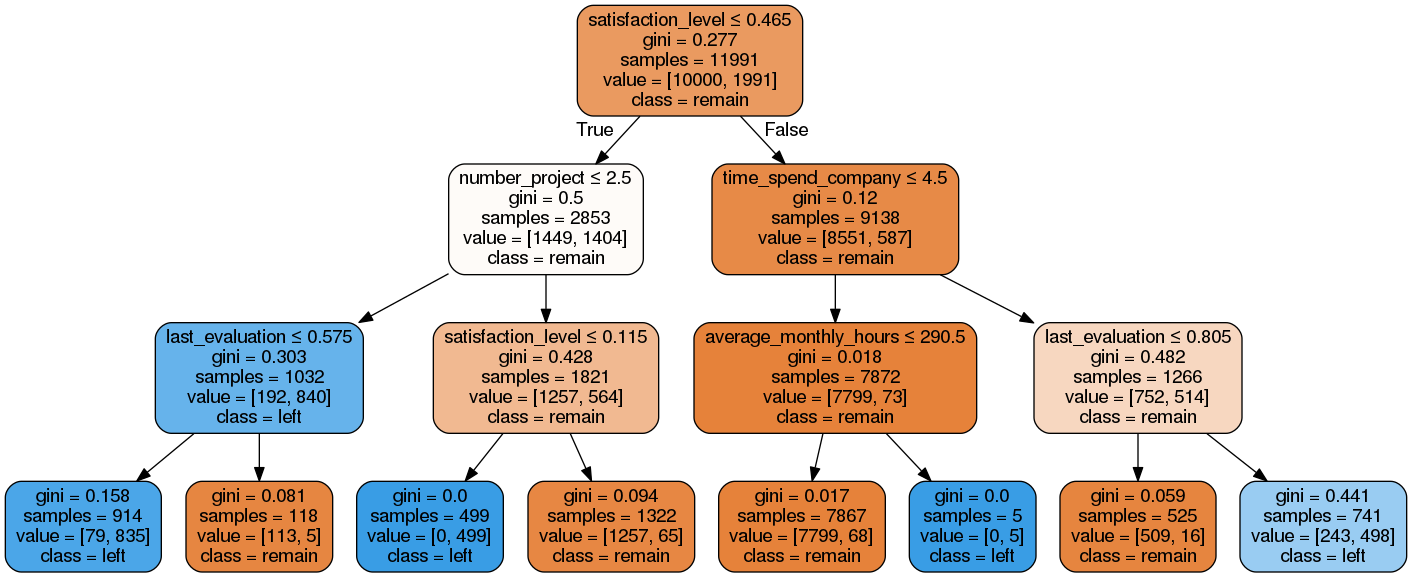

In [169]:
dot_data = tree.export_graphviz(dtc, out_file=None,  
                     feature_names=x_test.columns.tolist(),
                     class_names=['remain', 'left'],
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## __Support Vector Machines__ 

In [197]:
from sklearn.svm import SVC

In [198]:
clf3= GridSearchCV(SVC(kernel="poly"),
                  param_grid={"C":[10,100],"degree":np.arange(1)},
                  verbose=10)

In [199]:
clf3.fit(x,y)
clf3.best_score_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8339169584792396, total=   1.6s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8338754065549162, total=   1.7s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340840840840841, total=   1.7s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.6s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8339169584792396, total=   1.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.2s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8338754065549162, total=   1.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.5s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340840840840841, total=   1.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   17.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   17.1s finished


0.8339588024351597

In [205]:
#calculating some metrics
from sklearn import metrics

print("Accuracy:",accuracy_score(y_test,clf3.predict(x_test)))

Accuracy: 0.832743810005053


## __Gradient Boosting Classifier__ 

In [172]:
from sklearn.ensemble import GradientBoostingClassifier

In [173]:
gbc = GradientBoostingClassifier()

In [174]:
#Training the model
gbc.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [208]:
# Accuracy, 
#calculating some metrics
from sklearn import metrics

print("Accuracy:",accuracy_score(y_test,gbc.predict(x_test))) #now the accuracy is higher than before
print("Precision:",metrics.precision_score(y_test,gbc.predict(x_test))) 
print("Recall",metrics.recall_score(y_test,gbc.predict(x_test))) 

Accuracy: 0.9805457301667508
Precision: 0.9591836734693877
Recall 0.9229607250755287


## Conclusions

After having analyzed different models, the results are as follow:

* Regarding __Accuracy__, one metric for evaluating classification models definited as the fraction of predictions that our model got right.

* Random Forest with a accurace rate of 99.7% has the highest rate followed by Decision Tree and Gradient Boosting.

In [238]:
print("RF accuracy:",accuracy_score(y_test,rclf2.predict(x_test))) 
print("KNN accuracy",accuracy_score(y_test,clf1.predict(x_test)))
print("Dec.Tree accuracy",accuracy_score(y_test,dtc2.predict(x_test)))
print("GBC accuracy",accuracy_score(y_test,gbc.predict(x_test)))
print("SVC accuracy",accuracy_score(y_test,clf3.predict(x_test)))

RF accuracy: 0.9974734714502274
KNN accuracy 0.9717028802425467
Dec.Tree accuracy 0.9848408287013644
GBC accuracy 0.9805457301667508
SVC accuracy 0.832743810005053


So, to the question: __how often is the classifier correct?__ The answer would be 99.7% so it if possible to predict is the employees will leave the company or not.

* Regarding __Precision__ and __Recall__, 